<a href="https://colab.research.google.com/github/MilanCugur/Neuroevolution-LocalSearch/blob/master/Baseline_Model/Baseline_Neuroevolution_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def extract_dataset(path):
  """
  extract DoubledMNIST dataset
  Argument: path to .zip file with the dataset
  Return value: x_train, y_train, x_test, y_test lists of numpy arrays 
  
  (DoubledMNIST dataset: train size 120k images 56x56, test size 20k images 56x56)
  """
  # import libraries
  import os                     # for basic os operations
  from zipfile import ZipFile 
  from skimage import io
  import numpy as np
  import shutil
  
  if not path.endswith('.zip'):
    raise ValueError("Error: path is not '.zip' file")
  
  archive = ZipFile(path, 'r')  # extract
  archive.extractall('./DoubledMNIST')
  archive.close()
  del archive
  
  x_train = []
  y_train = []
  x_test = []
  y_test = []
  
  for file in os.listdir('./DoubledMNIST/train'):
    img = io.imread(os.path.join('./DoubledMNIST/train', file))
    x_train.append(np.array(img))
    y_train.append(int(file.split('_')[1]))
  
  for file in os.listdir('./DoubledMNIST/test'):
    img = io.imread(os.path.join('./DoubledMNIST/test', file))
    x_test.append(np.array(img))
    y_test.append(int(file.split('_')[1]))
    
  shutil.rmtree('./DoubledMNIST')
  return x_train, y_train, x_test, y_test

In [8]:
%%time
x_train, y_train, x_test, y_test = extract_dataset('./drive/My Drive/ni_sem/DoubledMNIST.zip')

CPU times: user 1min 8s, sys: 18.3 s, total: 1min 26s
Wall time: 1min 31s


In [9]:
print(len(x_train))  # size check
print(len(y_train))
print(len(x_test))
print(len(y_test))

120000
120000
20000
20000


In [10]:
x_train[0]

array([[255, 255, 255, ..., 215, 220, 223],
       [255, 255, 255, ..., 208, 214, 218],
       [255, 255, 255, ..., 198, 205, 210],
       ...,
       [245, 243, 240, ..., 230, 234, 237],
       [251, 250, 249, ..., 245, 246, 247],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

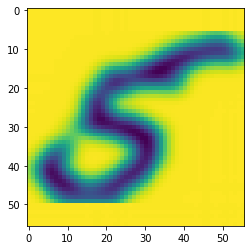

5


In [11]:
from matplotlib import pyplot as plt  # smal demonstration

plt.imshow(x_train[9])
plt.show()

print(y_train[9])

# Data preprocessing

# Neuroevolution Algorithm

# Resources

* Google Schoolar Searches: [link](https://scholar.google.com/scholar?hl=sr&as_sdt=0%2C5&q=genetic+cnn+handwritting&btnG=)

* Fokus na rad: 
 * .pdf: [link](https://arxiv.org/abs/1703.01513)
 * github: [link](https://arxiv.org/abs/1703.01513)
* Dodatno rad:
 *  .pdf: [link](https://arxiv.org/pdf/1710.10741.pdf)
 * Clanak na netu: [link](https://blog.coast.ai/lets-evolve-a-neural-network-with-a-genetic-algorithm-code-included-8809bece164)
* Ako sami implementiramo: [link](https://github.com/joeddav/devol/blob/master/devol/devol.py)
